In [271]:
import pandas as pd
import regex as re
import statistics
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
import json
import sys
sys.path.append('../bgc-analysis')
from  calc_sensor import pH_sbe, o2_sbe
import numpy as np
from datetime import datetime
from db_api import get_continuous_one_profile,get_continuous_one_float
from get_cal_sn import get_cal
from calc_sensor import pH_sbe
import openpyxl

In [272]:
SN = 1489       #UPDATE FOR EACH FLOAT
#whichtest = 'valve' #PICK PUMP OR VALVE
meta = get_cal(SN)
meta

,CTD_CNDC,CTD_TEMP,CTD_PRES,OPTODE_DOXY,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE,TRANSISTOR_PH
SENSOR_MAKER,SBE,SBE,DRUCK,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC,SBE
SENSOR_MODEL,SBE41CP_V5.3.5,SBE41CP_V5.3.5,DRUCK_2900PSIA,SBE63_V3.2.2,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2,SEAFET
SENSOR_SERIAL_NO,18115,18115,12254723,3253,370,370,370,1971,720-11976
SENSOR_CALIB_DATE,2022-09-11,2022-09-11,2022-09-07,2022-08-18,None,None,None,None,2022-09-19
COMMENTS,None,None,,None,,,,None,"added K2f0, K2f1, K2f2, K2f3; O-Ring: Si S"
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'G': -1.01875, 'H': 0.1392335, 'I': -0.000280...","{'TA0': -0.0008469718, 'TA1': 0.0002897291, 'T...","{'PA0': 0.3339194, 'PA1': 0.0003907655, 'PA2':...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'DARK_CDOM': 49, 'SCALE_CDOM': 0.005626}","{'DARK_CHLA': 51, 'SCALE_CHLA': 0.001868}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [-0.0045929, -0.00626375, 99.0, 0.0007...","{'F0': -1.283306923356, 'F1': 1.423471091636e-..."


In [273]:
cal = meta["TRANSISTOR_PH"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal
filelocation = 'G:\\Shared drives\WHOI Argo\BGC\Float Tracking\pressure_test_results\\' + 'combined_test_results' + '\\' + str(SN) + '_pressure_test_results' + ".xlsx"
dff = pd.read_excel(filelocation)


In [274]:
try:
    print(cal['K2'])
except:
    cal['K2'] = cal['K2f0']

try:
    cal['K0'] != NoneType
except:
    cal['K0'] = -1.32



In [275]:
(x,dff["PH_9"]) = pH_sbe(cal,dff["PH_VRS"],dff["PRES"],dff["TEMP"],dff["PSAL"])
time = dff['DATE']
time= pd.to_datetime(time)
print(time)

{'F0': -1.283306923356, 'F1': 1.423471091636e-05, 'F2': 9.132178122716e-09, 'F3': -1.372111604275e-10, 'F4': 3.489122765167e-13, 'F5': -4.544927237309e-16, 'F6': 3.445467056219e-19, 'F7': -1.532141484027e-22, 'F8': 3.707548880124e-26, 'F9': -3.769979272262e-30, 'K0': -1.32, 'K2f0': -0.00086768, 'K2f1': -6.2343e-08, 'K2f2': 4.6519e-11, 'K2f3': -1.1957e-14, 'K2': -0.00086768}
0     2023-05-17 09:58:42.224
1     2023-05-17 10:00:10.030
2     2023-05-17 10:01:04.499
3     2023-05-17 10:01:58.932
4     2023-05-17 10:02:53.428
                ...          
857   2023-05-18 12:48:59.692
858   2023-05-18 12:49:54.222
859   2023-05-18 12:50:48.734
860   2023-05-18 12:51:43.205
861   2023-05-18 12:52:37.654
Name: DATE, Length: 862, dtype: datetime64[ns]


In [276]:
timediff = []

for i, timedif in enumerate(time[:-1]):
    timediff.append(np.timedelta64(time[i+1]-time[i], 's'))
display(timediff)
td = np.array(timediff).cumsum() # time after starttime
display(td)
starttime = time[0]


[numpy.timedelta64(87,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(87,'s'),
 numpy.timedelta64(54,'s'),
 numpy.timedelta64(5

array([   87,   141,   195,   249,   303,   357,   411,   465,   519,
         573,   627,   681,   735,   789,   843,   897,   951,  1005,
        1059,  1113,  1167,  1221,  1275,  1329,  1383,  1437,  1491,
        1545,  1599,  1653,  1707,  1761,  1815,  1902,  1956,  2010,
        2064,  2118,  2172,  2226,  2280,  2334,  2388,  2442,  2496,
        2550,  2604,  2658,  2712,  2766,  2820,  2874,  2928,  2982,
        3036,  3090,  3144,  3198,  3252,  3306,  3360,  3414,  3468,
        3522,  3576,  3630,  3717,  3771,  3825,  3879,  3933,  3987,
        4041,  4095,  4149,  4203,  4257,  4311,  4365,  4419,  4473,
        4527,  4581,  4635,  4689,  4743,  4797,  4851,  4905,  4959,
        5013,  5067,  5121,  5175,  5229,  5283,  5337,  5391,  5445,
        5532,  5586,  5640,  5694,  5748,  5802,  5856,  5910,  5964,
        6018,  6072,  6126,  6180,  6234,  6288,  6342,  6396,  6450,
        6504,  6558,  6612,  6666,  6720,  6774,  6828,  6882,  6936,
        6990,  7044,

In [277]:
td = td.astype(float)
display(td)
display(len(td))


array([8.7000e+01, 1.4100e+02, 1.9500e+02, 2.4900e+02, 3.0300e+02,
       3.5700e+02, 4.1100e+02, 4.6500e+02, 5.1900e+02, 5.7300e+02,
       6.2700e+02, 6.8100e+02, 7.3500e+02, 7.8900e+02, 8.4300e+02,
       8.9700e+02, 9.5100e+02, 1.0050e+03, 1.0590e+03, 1.1130e+03,
       1.1670e+03, 1.2210e+03, 1.2750e+03, 1.3290e+03, 1.3830e+03,
       1.4370e+03, 1.4910e+03, 1.5450e+03, 1.5990e+03, 1.6530e+03,
       1.7070e+03, 1.7610e+03, 1.8150e+03, 1.9020e+03, 1.9560e+03,
       2.0100e+03, 2.0640e+03, 2.1180e+03, 2.1720e+03, 2.2260e+03,
       2.2800e+03, 2.3340e+03, 2.3880e+03, 2.4420e+03, 2.4960e+03,
       2.5500e+03, 2.6040e+03, 2.6580e+03, 2.7120e+03, 2.7660e+03,
       2.8200e+03, 2.8740e+03, 2.9280e+03, 2.9820e+03, 3.0360e+03,
       3.0900e+03, 3.1440e+03, 3.1980e+03, 3.2520e+03, 3.3060e+03,
       3.3600e+03, 3.4140e+03, 3.4680e+03, 3.5220e+03, 3.5760e+03,
       3.6300e+03, 3.7170e+03, 3.7710e+03, 3.8250e+03, 3.8790e+03,
       3.9330e+03, 3.9870e+03, 4.0410e+03, 4.0950e+03, 4.1490e

861

[7.449046617096923, 7.4479255099858435, 7.446292328143084, 7.445826908512432, 7.447431029624399, 7.448562649528335, 7.432117007770108, 7.429558385575643, 7.420457449821592, 7.417354698566301, 7.414077469492529, 7.410936809970227, 7.398837397567141, 7.394889877770458, 7.402740550020589, 7.391359186072954, 7.380824620644617, 7.380774867209654, 7.381192346207348, 7.381652182891328, 7.3812718221492055, 7.380696316577874, 7.38004203399485, 7.379574686499749, 7.379855099499178, 7.379643530971557, 7.3799583579972685, 7.378589030216522, 7.37788335482867, 7.378176581123049, 7.378489027660008, 7.378181365097137, 7.377343676535596, 7.3773687909094585, 7.3767197044426025, 7.376756413226144, 7.375957522537779, 7.3764786483979465, 7.3760766031200715, 7.374643648760294, 7.3750073841809485, 7.3745208477686495, 7.374649632396858, 7.3749229196358375, 7.373322353057416, 7.373658186917954, 7.373565913200997, 7.373285132847156, 7.372616174840052, 7.373199851433844, 7.372243899089593, 7.371696713924065, 7.3

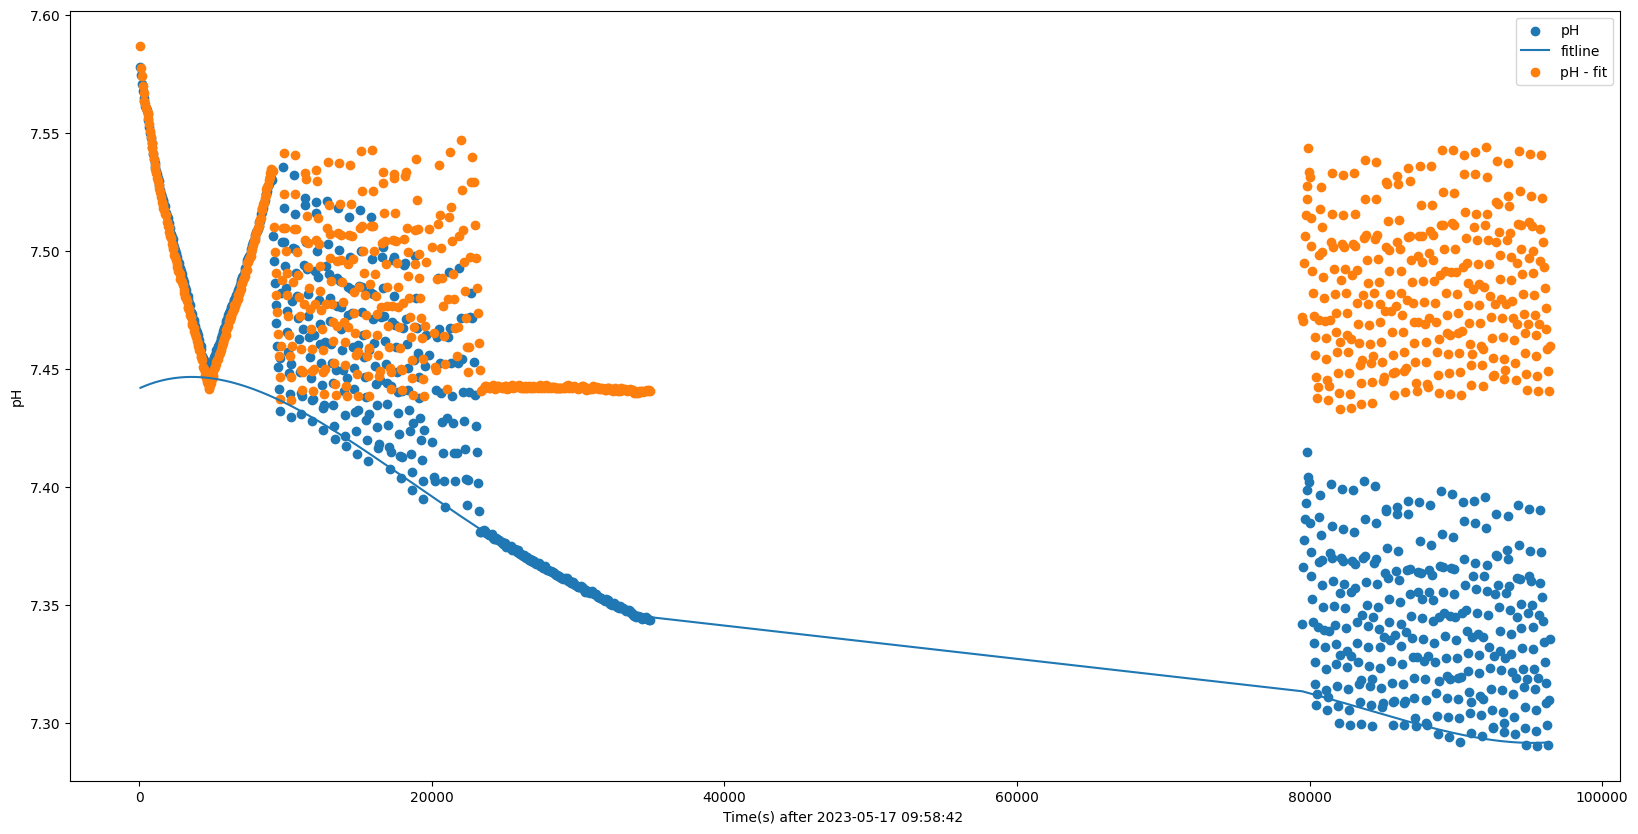

In [278]:
pressure = dff['PRES']
r = []
l = []
t = []
for i, pres in enumerate(pressure[1:]):
    if pressure[i] > 1900:
        r.append(x[i])
        l.append(pressure[i])
        t.append(td[i])
print(r)
print(l)
print(t)
time = td
m5, m4, m3, m2, m, b = np.polyfit(t,r,5)
#m, b = np.polyfit(t,r,1)
ph = []
for t in td:
    ph.append( (m5*t**5)+ (m4*t**4) + (m3*t**3)+ (m2*t**2)+ (m*t))
    #ph.append(m*t)
pH = []
for j, phh in enumerate(ph):
    pH.append(x[j]-ph[j])
print(pH)
print(starttime)
fig = plt.subplots(figsize = (20,10))
plt.scatter(time,x[1:])
plt.plot(time,ph+b)
plt.scatter(time,pH)
plt.xlabel('Time(s) after 2023-05-17 09:58:42 ')
plt.ylabel('pH')
plt.legend(['pH', 'fitline', 'pH - fit'])

Text(0.5, 0, 'pH Value')

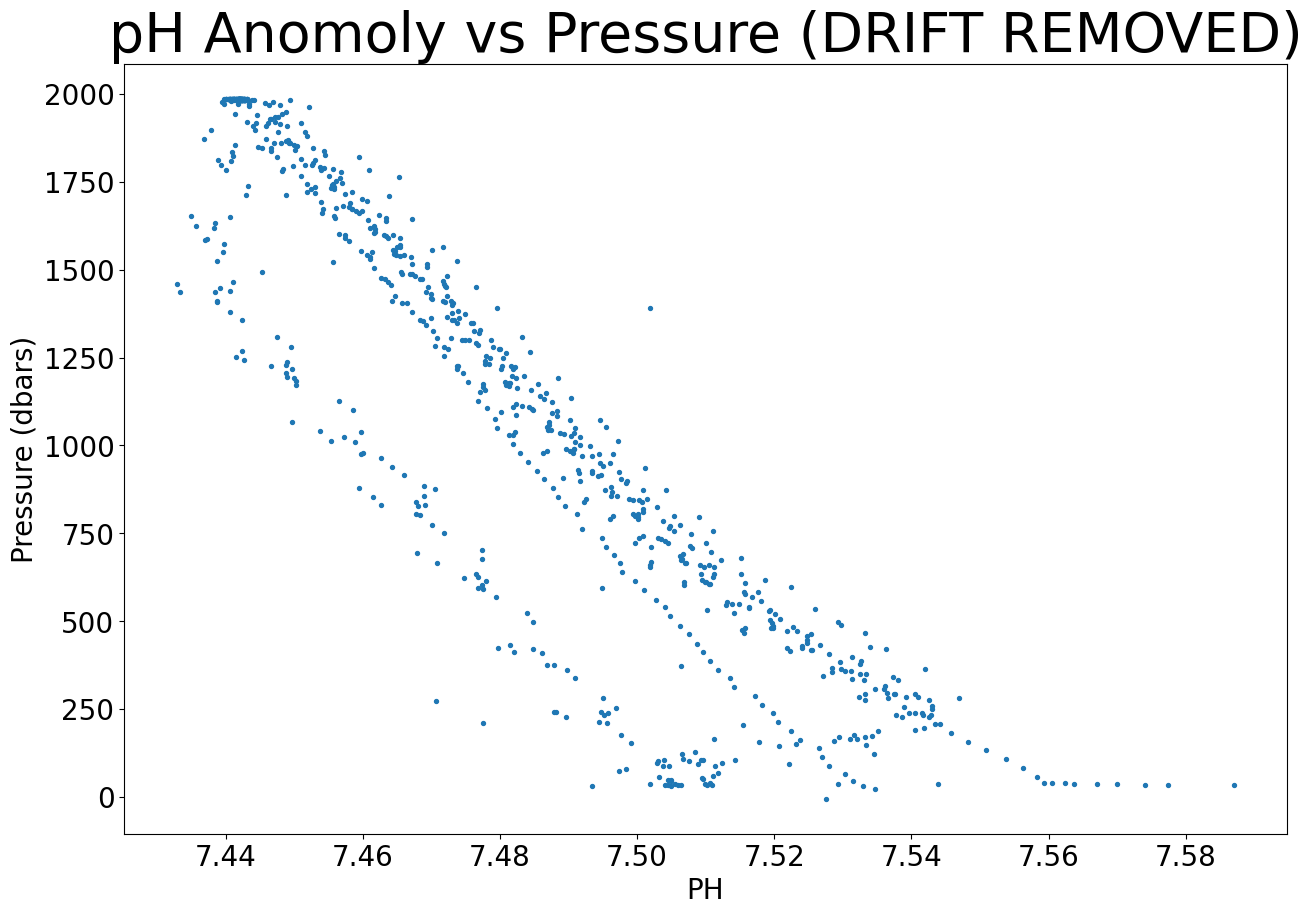

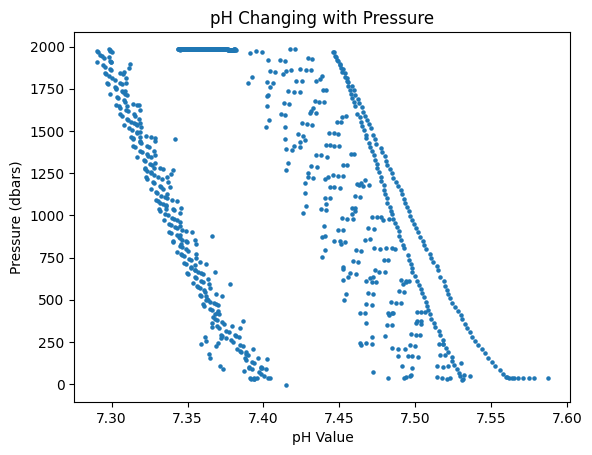

In [279]:

fig, fig1=plt.subplots(figsize = (15,10))
plt.scatter(pH,pressure[1:], s=8)
fig1.set_ylabel('Pressure (dbars)', fontsize = 20)
fig1.set_xlabel('PH', fontsize = 20)
fig1.set_title('pH Anomoly vs Pressure (DRIFT REMOVED)', fontsize= 40)
fig1.tick_params(axis = 'both', which = 'major', labelsize = 20)
figure()
fig2 = plt.scatter(x,pressure,s=5)
plt.title('pH Changing with Pressure')
plt.ylabel('Pressure (dbars)')
plt.xlabel('pH Value')


[7.52759665 7.52436476 7.53138498 7.51868367 7.51784443 7.5132816
 7.52509007 7.52055987 7.52837296 7.52967117 7.51663934 7.52510047
 7.51691846 7.51770467 7.53329117 7.53034585 7.53572353 7.52375765
 7.52203775 7.5133229  7.50743812 7.51780446 7.51329406 7.52163748
 7.51896018 7.51482182 7.51028052 7.51489565 7.50601151 7.50550464
 7.50321534 7.49732343 7.50201582 7.50261988 7.50293621 7.49547683
 7.50361481 7.49749572 7.50357626 7.49525197 7.49378192 7.48747177
 7.49137486 7.48477335 7.48542845 7.49363037 7.48975654 7.49019807
 7.48302676 7.4830801  7.48598553 7.4793201  7.48114628 7.48100036
 7.48692875 7.48090406 7.47732774 7.48735906 7.48015063 7.47370393
 7.46978508 7.4702467  7.46923674 7.46651678 7.47251536 7.47589607
 7.46959601 7.47291478 7.46867913 7.46596214 7.47132867 7.46557511
 7.44846166 7.46354545 7.4669393  7.46048944 7.46098799 7.46383934
 7.46243182 7.45005335 7.45902205 7.45340341 7.45818284 7.45327806
 7.45703325 7.45816959 7.4537716  7.45378433 7.45683728 7.45200

Text(0.5, 1.0, 'Unbinned pH at Pressures')

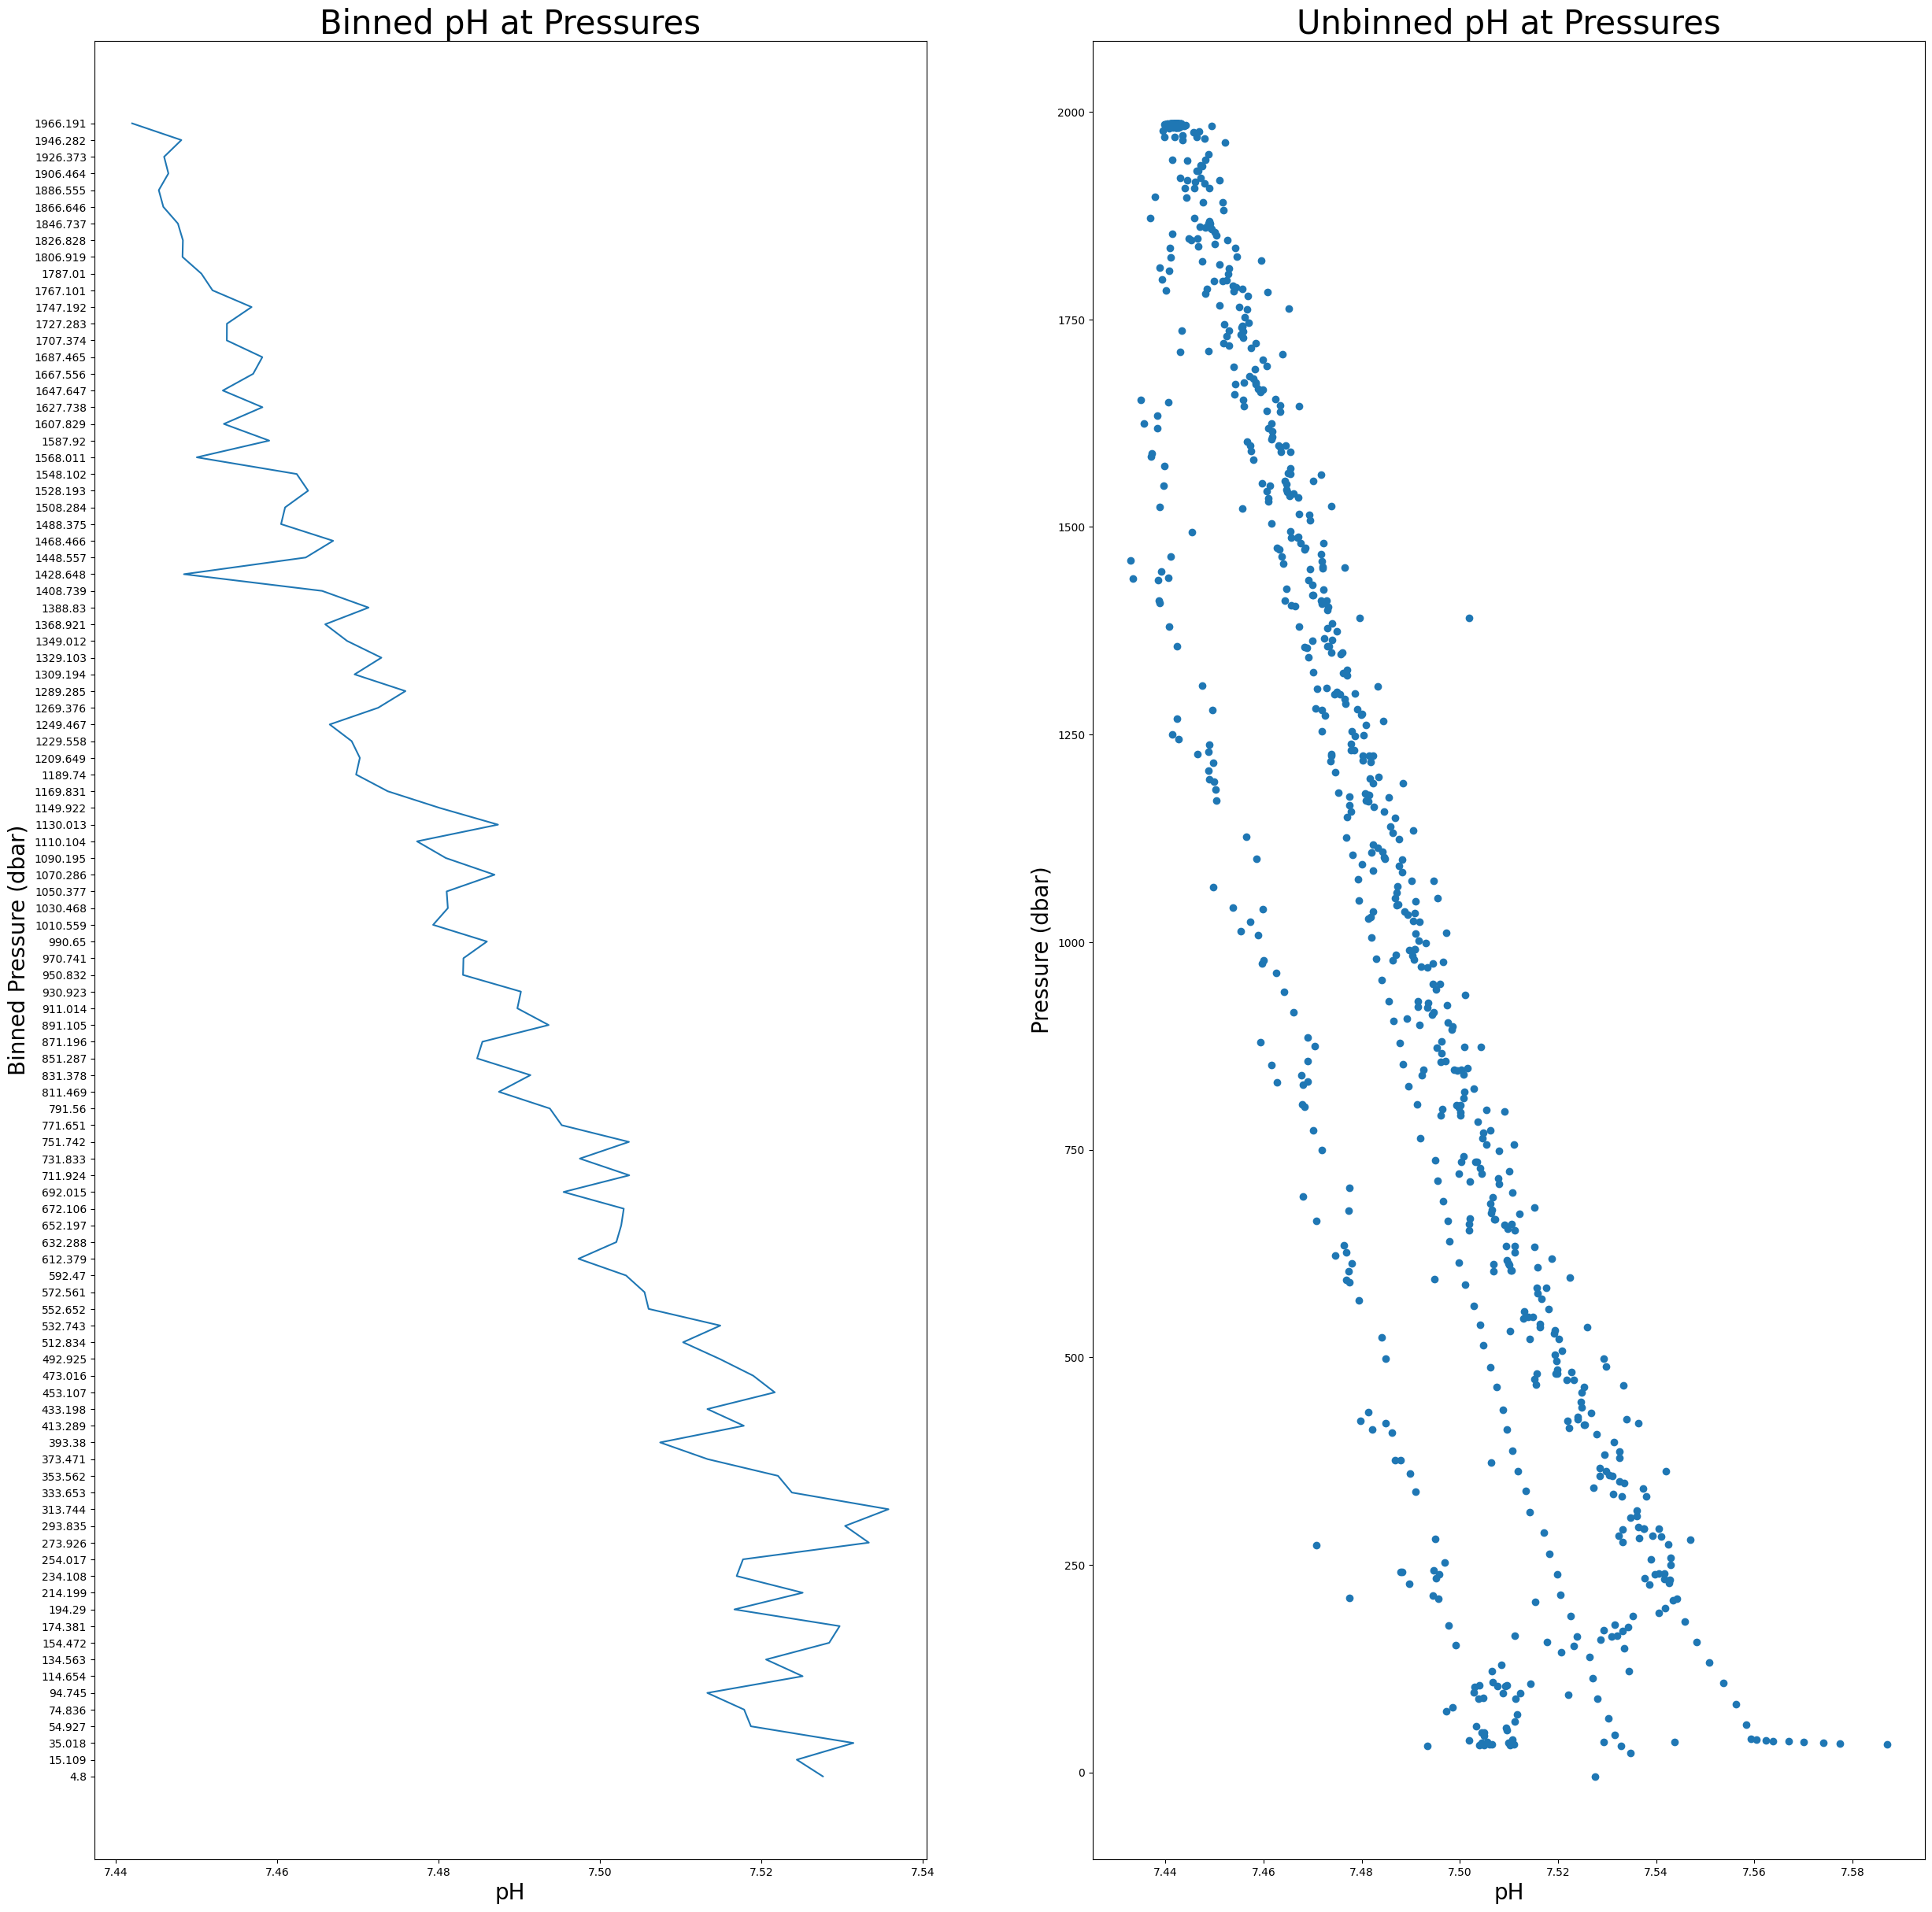

In [280]:
binvalues= scipy.stats.binned_statistic(pressure[1:],pH,statistic = 'mean', bins = 100, range = None)
print(binvalues[0])
t = [binvalues[1]]
print(t)
t= str(t)
print(t)

tt = re.findall(r'\d*\.\d*', t)
ttt = []
for tttt in tt:
    ttt.append(tttt)
print(ttt)
ttt= ttt[:-1]
fig, fig3 = plt.subplots( 1,2, figsize= (30,30))
fig3[0].plot(binvalues[0],ttt)
fig3[0].set_xlabel('pH', fontsize = 20)
fig3[0].set_ylabel('Binned Pressure (dbar)', fontsize = 20)
fig3[0].set_title('Binned pH at Pressures', fontsize = 30)
fig3[1].scatter(pH,pressure[1:])
fig3[1].set_ylabel('Pressure (dbar)', fontsize = 20)
fig3[1].set_xlabel('pH', fontsize = 20)
fig3[1].set_title('Unbinned pH at Pressures', fontsize = 30)

#plt.plot(phanom, pressure)
